# __ASSIGNMENT 7__

## IMPORT LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

## Problem 1

### 1.

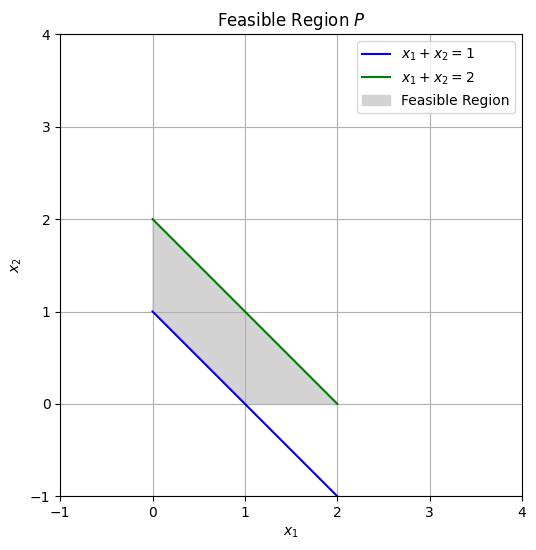

In [21]:
x = np.linspace(0, 2, 200)
y1 = 1 - x   
y2 = 2 - x  

# NOTE: labeling as the teacher suggestion by refactored 
plt.figure(figsize=(6, 6))
plt.plot(x, y1, label=r'$x_1 + x_2 = 1$', color='blue')
plt.plot(x, y2, label=r'$x_1 + x_2 = 2$', color='green')

# NOTE: it took me long to understand all this cool functionalities 
x_fill = np.linspace(0, 2, 200)
y_fill_upper = np.minimum(2 - x_fill, np.full_like(x_fill, 2))
y_fill_lower = np.maximum(1 - x_fill, np.zeros_like(x_fill))
plt.fill_between(x_fill, y_fill_lower, y_fill_upper, where=y_fill_upper > y_fill_lower, color='lightgray', label='Feasible Region')

plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Feasible Region $P$')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


### 2.

In [22]:
A = np.array([
    [1, 1, -1,  0],  
    [1, 1,  0,  1]  
])

b = np.array([1, 2])

print("A =", A)
print("b =", b)

m = A.shape[0]
print("Number of constraints (m - as said in assignment):", m)

A = [[ 1  1 -1  0]
 [ 1  1  0  1]]
b = [1 2]
Number of constraints (m - as said in assignment): 2


### 3.

In [23]:
def extract_basis_matrix(A, basic_indices):
    return A[:, basic_indices]

indices = [2, 3]  
B1 = extract_basis_matrix(A, indices)

print("Basis matrix called B1:", B1)

Basis matrix called B1: [[-1  0]
 [ 0  1]]


### 4

In [24]:
def basic_variables(B, b):

    det = np.linalg.det(B)
    if abs(det) < 1e-10:
        return None
    
    xB = np.linalg.solve(B, b)
    return xB

xB1 = basic_variables(B1, b)

if xB1 is None :
    print("Matrix is singular")
else :
    print("Basis matrix B1:\n", B1)
    print("Basic variable solution xB1:\n", xB1)


Basis matrix B1:
 [[-1  0]
 [ 0  1]]
Basic variable solution xB1:
 [-1.  2.]


### 5.

In [25]:
def is_feasible(xB):
    return np.all(xB >= 0)

def is_degenerate(xB):
    return np.any(xB == 0)

xB1 = np.array([-1., 2.])  

print("the used xB1 =", xB1)
print("is it Feasible?", is_feasible(xB1))
print("is it Degenerate?", is_degenerate(xB1)) 

the used xB1 = [-1.  2.]
is it Feasible? False
is it Degenerate? False


### 6

In [26]:
def full_basic_solution(n, xB, indices):
    x = np.zeros(n)
    for i, idx in enumerate(indices):
        x[idx] = xB[i]
    return x

n = 4
full = full_basic_solution(n, xB1, indices)

print("Full basic solution x:\n", full)

Full basic solution x:
 [ 0.  0. -1.  2.]


### 7.

In [ ]:
def construct_basic_solution(A, b, basic_indices):
    B = extract_basis_matrix(A, basic_indices)
    xB = basic_variables(B, b)
    
    if xB is None:
        return None, False, False  # Singular matrix case
    
    x = full_basic_solution(A.shape[1], xB, basic_indices)
    is_feas = is_feasible(xB)
    is_degen = is_degenerate(xB)
    
    return x, is_feas, is_degen

### 8.

In [ ]:
m, n = A.shape
all_indices = list(range(n))

feasible_count = 0
degenerate_count = 0

print("All basic solutions:")
for basic_indices in combinations(all_indices, m):
    x, is_feas, is_degen = construct_basic_solution(A, b, list(basic_indices))
    
    print(f"Basic indices: {basic_indices}")
    if x is None:
        print("  -> Singular matrix, no solution\n")
    else:
        print(f"  -> Solution x: {x}")
        print(f"     Feasible? {is_feas}")
        print(f"     Degenerate? {is_degen}\n")
        
        if is_feas:
            feasible_count += 1
        if is_degen and is_feas:
            degenerate_count += 1

print("Summary:")
print(f"Total basic feasible solutions: {feasible_count}")
print(f"Degenerate basic feasible solutions: {degenerate_count}")

### 9.

In [ ]:
def reduced_costs(A, c, basic_indices):
    n = A.shape[1]
    B = A[:, basic_indices]
    try:
        B_inv = np.linalg.inv(B)
    except np.linalg.LinAlgError:
        return None, False  # B is singular

    c_B = c[basic_indices]
    c_bar = np.zeros(n)

    for j in range(n):
        A_j = A[:, j]
        c_bar[j] = c[j] - c_B @ B_inv @ A_j

    is_optimal = np.all(c_bar >= -1e-10)  # numerical stability with tolerance
    return c_bar, is_optimal

# --- Example data ---
A = np.array([
    [1, 1, -1, 0],
    [1, 1, 0, 1]
])
c = np.array([1, 1, 0, 0])
basic_indices = [0, 3]

# --- Test ---
c_bar, is_optimal = reduced_costs(A, c, basic_indices)

print("Reduced costs vector:", c_bar)
print("Is optimal? (all reduced costs ≥ 0):", is_optimal)

### 10.